In [1]:
import common_options as co
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pandas as pd
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon

%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.config(overpass_endpoint="http://127.0.0.1:12345/api")
ox.__version__

'1.1.0'

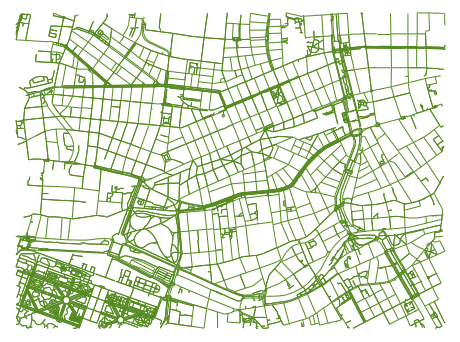

In [2]:
G = ox.graph_from_bbox(*co.bb_westbahnhofareal, clean_periphery=True, simplify=False, custom_filter=co.walking_filter_wbh, 
    network_type='drive' # otherwise oneway attribute is lost
)

fig, ax = ox.plot_graph(G, edge_color=co.col_green, edge_alpha=1, node_size=0, bgcolor='white')

fig.savefig('figures/street_network_ped.svg')
fig.savefig('figures/street_network_ped.png', bbox_inches='tight')


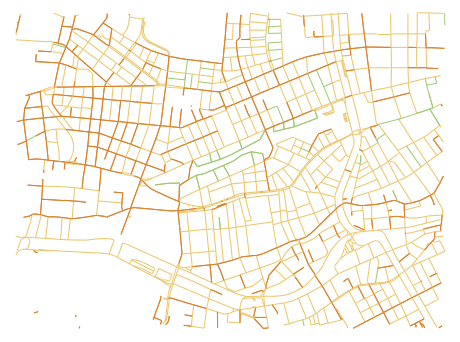

In [3]:
def color(d):
    if d.get('highway') == 'living_street':
        return co.col_greens_2[0]
    if d.get('oneway') == True:
        return co.col_yellow
    if d.get('highway') in ['footway', 'cycleway', 'service', 'steps', 'path']:
        return '#ffffff00' #co.col_lightgray
    return co.col_orange

G = ox.graph_from_bbox(*co.bb_westbahnhofareal, clean_periphery=True, simplify=False, custom_filter=co.walking_filter_wbh, 
    network_type='drive' # otherwise oneway attribute is lost
)

ec = [color(d) for u, v, k, d in G.edges(keys=True, data=True)]

fig, ax = ox.plot_graph(G, edge_color=ec, node_size=0, bgcolor='white')

fig.savefig('figures/street_network_mit.svg')
fig.savefig('figures/street_network_mit.png', bbox_inches='tight')
